In [ ]:
# DEPRECATED - IGNORE FOR NOW
! pip install einops

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

import torch
import timm

from typing import Any, Dict, List, Tuple, Optional

from einops import repeat, rearrange
from einops.layers.torch import Rearrange

from timm.models.layers import trunc_normal_
from timm.models.vision_transformer import Block
import torch.nn.functional as F


/home/local/SRI/e33725/.conda/envs/aie-cmaas-int/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_path = "/home/local/SRI/e33725/AIE-CMAAS/k8s-logs/cmta3-pretrain-maevit/runs/2024-02-29_14-26-28/"
img = np.load(f"{root_path}img.npy")
mask = np.load(f"{root_path}mask.npy")
pred_img = np.load(f"{root_path}preds.npy")


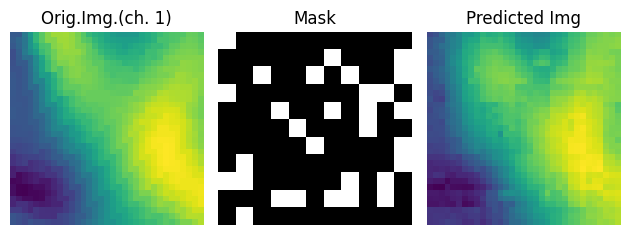

In [15]:
batch_index = random.randint(0, 1023) #1, 96, 62*
channel_index = random.randint(0, 13) #3, 7, 1*
fig, axes = plt.subplots(1, 3)
img_plot = axes[0].imshow(img[batch_index, channel_index, :, :])
axes[1].imshow(1-mask[batch_index, channel_index, :, :], cmap='gray')
# axes[2].imshow((1-mask[batch_index, channel_index, :, :])*img[batch_index, channel_index, :, :])#, vmin=img_plot.get_clim()[0], vmax=img_plot.get_clim()[1])
axes[2].imshow(pred_img[batch_index, channel_index, :, :])#, cmap='plasma')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
# axes[3].axis('off')
axes[0].set_title(f"Orig.Img.(ch. {channel_index})")
axes[1].set_title(f"Mask")
# axes[2].set_title(f"Orig.Img.+Mask")
axes[2].set_title(f"Predicted Img")

plt.tight_layout()
plt.show()